# Setup 

Instalación de librerias, imports y carga del los datos

In [ ]:
%pip install --quiet numpy
%pip install --quiet pandas
%pip install --quiet matplotlib

%pip install --quiet seaborn
%pip install --quiet scipy
%pip install --quiet fitter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import scipy.stats as stats

# Leer el archivo CSV
data = pd.read_csv('portugal_housing.csv')

C:\Users\pablo\AppData\Local\Temp\ipykernel_34740\2526014842.py:11: DtypeWarning: Columns (6,7,9,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('portugal_housing.csv')


In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Descripción del dataset



This [dataset](https://www.kaggle.com/datasets/luvathoms/portugal-real-estate-2024) contains the more than 100k real asking prices for real estate properties listed on Portuguese real estate websites. The data was legally and ethically scraped from several online platforms, ensuring compliance with the platforms' terms and conditions.

The dataset includes detailed information about each property listing, such as:

- **Price**: The asking price of the property in Euros.
- **District, City, Town**: The geographical location of the property, allowing for regional analysis.
- **Type**: The type of property (e.g., Apartment, House, Garage, Land).
- **EnergyCertificate**: The energy efficiency rating of the property, according to Portuguese energy certification standards.
- **Area Measurements**: Several columns related to the size and area of the property, including:
- **GrossPrivateArea**: The private gross area of the property.
- **UsableArea**: The area that can be used for living.
- **LivingArea**: The actual livable space inside the property.
- **LotSize**: The size of the land associated with the property.
- **BuiltArea**: The total constructed area of the property.
- **Rooms, Bedrooms, Bathrooms, WCs**: Detailed breakdowns of the number of rooms, bedrooms, bathrooms, and water closets in the property.
- **Floor**: The floor on which the property is located.
- **Parking, Garage**: Information on parking availability and the presence of a garage.
- **Additional Features**: Whether the property includes amenities like elevators or electric car charging stations.
- **ConstructionYear**: The year the property was built.
- **PublishDate**: The date when the listing was published.

The dataset is suitable for a variety of analyses, including:

Price trends: Understanding the relationship between location, property features, and asking prices.
Energy efficiency: Investigating how energy certification impacts property values.
Geographical analysis: Exploring regional differences in real estate pricing across Portugal.
This dataset offers a comprehensive snapshot of the Portuguese real estate market, enabling users to gain insights into current pricing, property types, and location-based factors influencing the market.

El objetivo de este Notebook es hacer un análisis estadístico de los datos, no una preparación de los mismos. 

# Análisis de los datos

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114379 entries, 0 to 114622
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Price                 114379 non-null  float64
 1   District              114379 non-null  object 
 2   City                  114379 non-null  object 
 3   Town                  114377 non-null  object 
 4   Type                  114363 non-null  object 
 5   EnergyCertificate     114365 non-null  object 
 6   Floor                 27846 non-null   object 
 7   Lift                  68075 non-null   object 
 8   Parking               114185 non-null  float64
 9   HasParking            68075 non-null   object 
 10  ConstructionYear      73429 non-null   float64
 11  TotalArea             107932 non-null  float64
 12  GrossArea             27617 non-null   float64
 13  PublishDate           15056 non-null   object 
 14  Garage                46272 non-null   object 
 15  Eleva

In [33]:
# Eliminadmos filas duplicadas
duplicados = data.duplicated()
print(data[duplicados])
data.drop_duplicates(inplace=True)


            Price   District                        City  \
98       120000.0       Faro                      Tavira   
133      120000.0       Faro                      Tavira   
134      120000.0       Faro                      Tavira   
139      660000.0       Faro                      Silves   
143      680000.0       Faro                      Silves   
...           ...        ...                         ...   
114461   239000.0  Vila Real                      Chaves   
114547  1250000.0       Faro  Vila Real de Santo António   
114548  1300000.0       Faro  Vila Real de Santo António   
114549  1400000.0       Faro  Vila Real de Santo António   
114550  1300000.0       Faro  Vila Real de Santo António   

                                   Town   Type EnergyCertificate Floor   Lift  \
98      Tavira (Santa Maria e Santiago)   Land                NC   NaN  False   
133     Tavira (Santa Maria e Santiago)   Land                NC   NaN  False   
134     Tavira (Santa Maria e Santia

In [ ]:
# se eliminan las filas con precio nulo al ser la variable a estudiar. No se tratan el resto de nulos puesto que no es una preparación de datos.
print(data["Price"].isnull().sum())
data = data.dropna(subset=["Price"])

232


# Descriptiva univariante y bivariante 

- Variables categóricas: 
  - Nominativas
  - Ordinales
- Variables cuántitativas:
  - Discretas
  - Continuas 

## Descriptiva univariante 

### Variables Cuántitativas 

In [88]:
data.describe()

,Price,Parking,ConstructionYear,TotalArea,GrossArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
count,1.143790e+05,114185.000000,73429.000000,1.079320e+05,2.761700e+04,65104.000000,30610.000000,41424.000000,8.714800e+04,2.888600e+04,1.836600e+04,109026.000000
mean,3.666081e+05,0.583868,1988.768103,6.052723e+05,2.791684e+03,3.106629,2.674355,0.405731,1.522202e+03,7.342400e+04,3.686693e+03,1.501633
std,4.128282e+06,0.884670,26.742694,1.870069e+08,1.154108e+05,11.070631,1.905010,1.023325,3.759342e+04,6.096242e+06,1.405066e+05,1.706682
min,1.000000e+02,0.000000,1900.000000,-7.196067e+06,-7.000000e+00,0.000000,0.000000,-15.000000,0.000000e+00,0.000000e+00,-1.000000e+00,-13.000000
25%,7.800000e+04,0.000000,1972.000000,9.500000e+01,1.000000e+02,2.000000,2.000000,0.000000,8.000000e+01,2.960000e+02,1.072950e+02,0.000000
50%,2.000000e+05,0.000000,1994.000000,1.770000e+02,1.640000e+02,3.000000,3.000000,0.000000,1.210000e+02,7.960000e+02,1.780000e+02,1.000000
75%,3.900000e+05,1.000000,2008.000000,6.212500e+02,2.940000e+02,4.000000,3.000000,0.000000,2.150000e+02,3.299750e+03,3.220600e+02,2.000000
max,1.380000e+09,3.000000,2024.000000,6.142007e+10,1.275000e+07,2751.000000,21.000000,59.000000,5.429000e+06,9.923010e+08,1.275000e+07,90.000000


- **Precio** (discreta): vemos que la medía (3,6e+10^5) está lejos de la mediana (2e+10^5). El rango es muy amplio, vemos un máximo muy lejos de donde parecen encontrarse la mayoría de datos. 
- **Parking** (continua): La mayoría de propiedades no tienen parking
- **ConstrucctionYear** (continua): un rango de 1988 a 2024
- **TotalArea** (continua): un comportamiento parecido al precio, la media bastante por encima de la mediana. Y un máximo muy lejos de la mayoría de los datos. Parece que hay datos anómalos, el mínimo en negativo. 
- **TotalRooms** (discreta): Las propiedades tienen una media de 3 habitacinoes y parece que hay algún dato muy lejos del resto. 
- **NumberOfWC** (discreta): Una media de 0.4 baños. Es un dato que está poco informado
- **LivingArea** (continua): comportamiento aprecido a los precio y la TotalArea
- **LotSize** (continua):
- **BuiltArea** (discreta): 
- **NumberOfBathrooms** (discreta): 

### Variables Categóricas

Vamos a ver como se distribuyen las variables categóricas. Se han cambiado los nulos por 'Sin asignar' para poder ver la cantidad de nulos en cada columna. 
Para las variables City y Town no se muestra el histograma puesto que no es relevante. 
Todas las variables son categóricas a excepción de Energy Certificate, Status y Floor que se podrían considerar ordinales. 

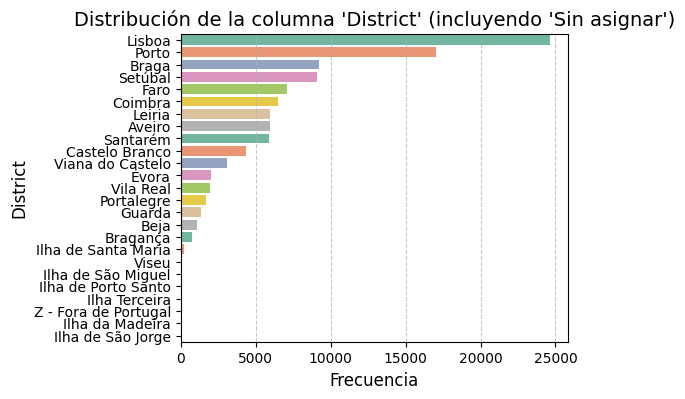

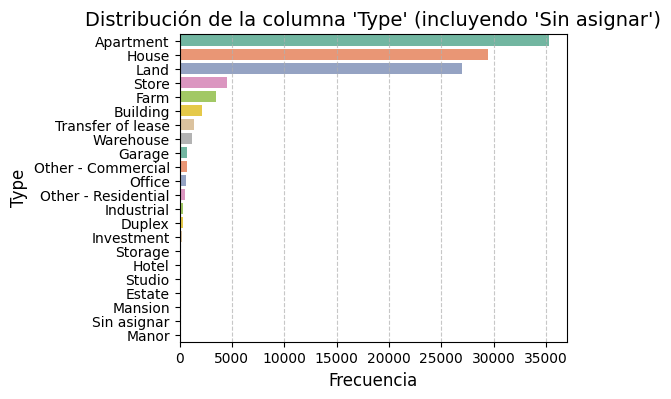

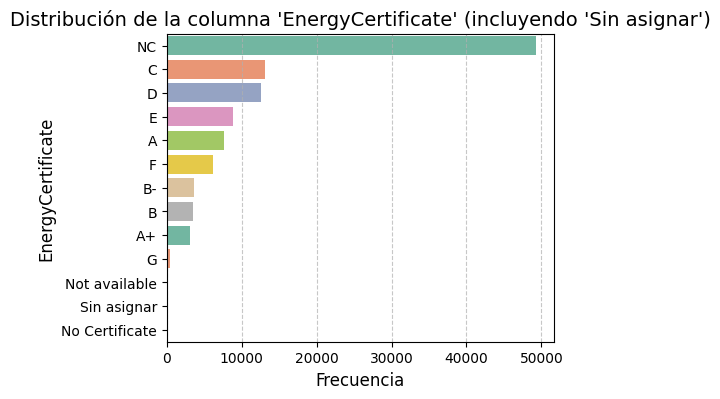

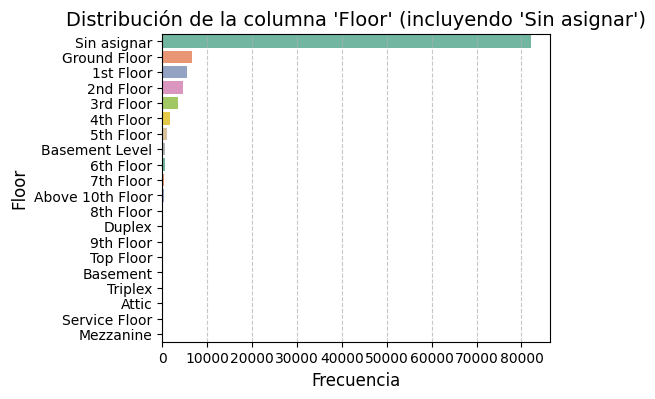

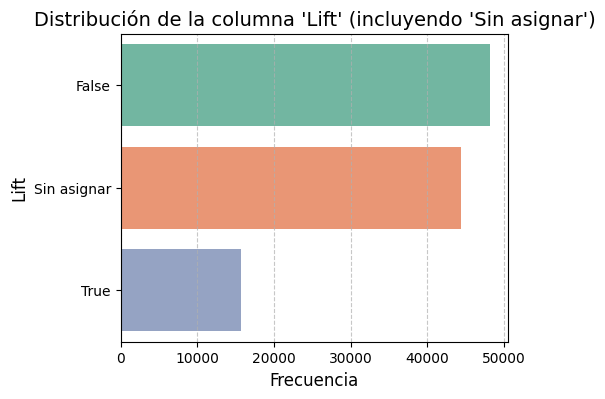

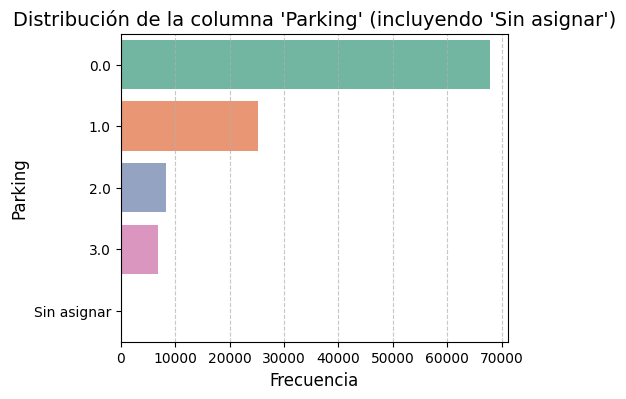

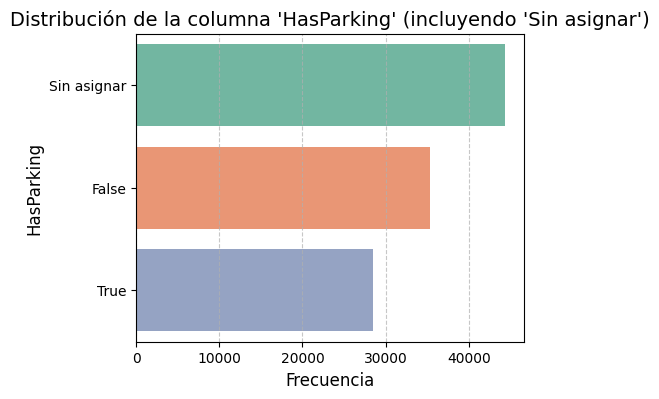

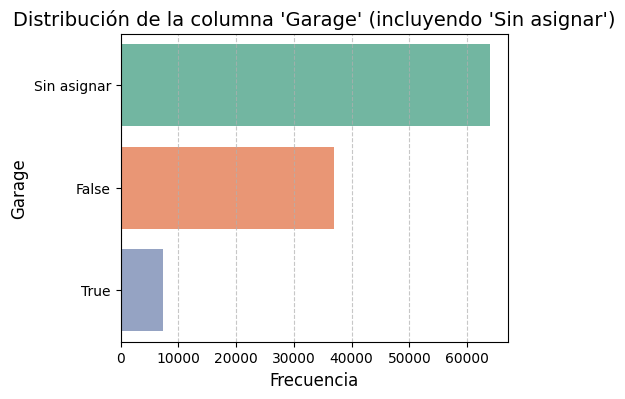

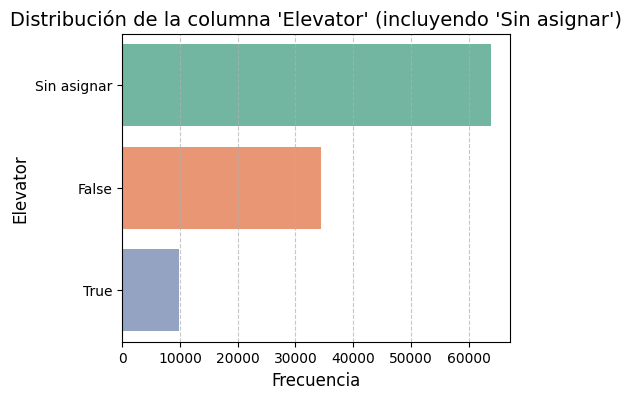

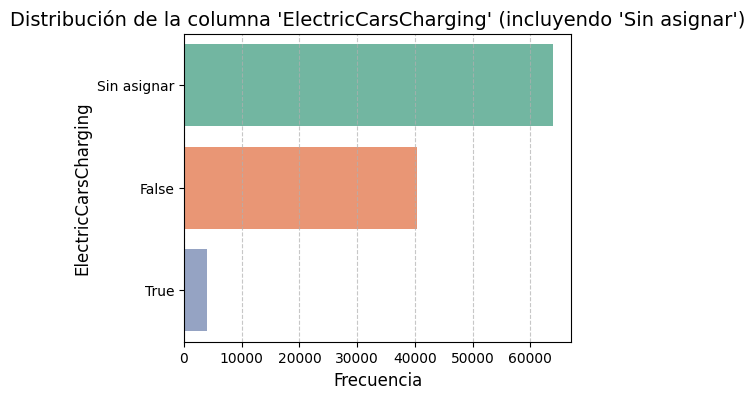

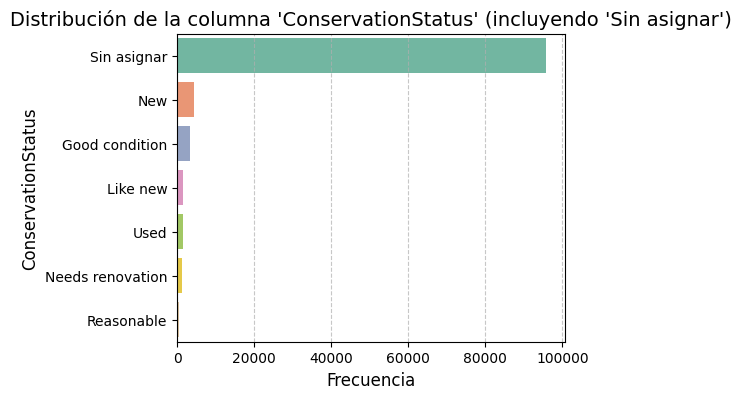

In [15]:

# Reemplazar valores nulos por "Sin asignar" para las columnas categóricas
categorical_columns = [
    'District',  'Type', 'EnergyCertificate', 'Floor', 
    'Lift', 'Parking', 'HasParking', 'Garage', 'Elevator', 
    'ElectricCarsCharging', 'ConservationStatus'
]

data_filled = data.copy()  # Crear una copia para no modificar el dataset original
data_filled[categorical_columns] = data_filled[categorical_columns].fillna("Sin asignar")

# Graficar cada columna con la categoría "Sin asignar"
for col in categorical_columns:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=data_filled, y=col, palette='Set2', order=data_filled[col].value_counts().index)
    plt.title(f"Distribución de la columna '{col}' (incluyendo 'Sin asignar')", fontsize=14)
    plt.xlabel("Frecuencia", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# 'City', 'Town',

## Descriptiva bivariante

### Análisis de variables 

### Comportamiento del precio según el tipo de propiedad

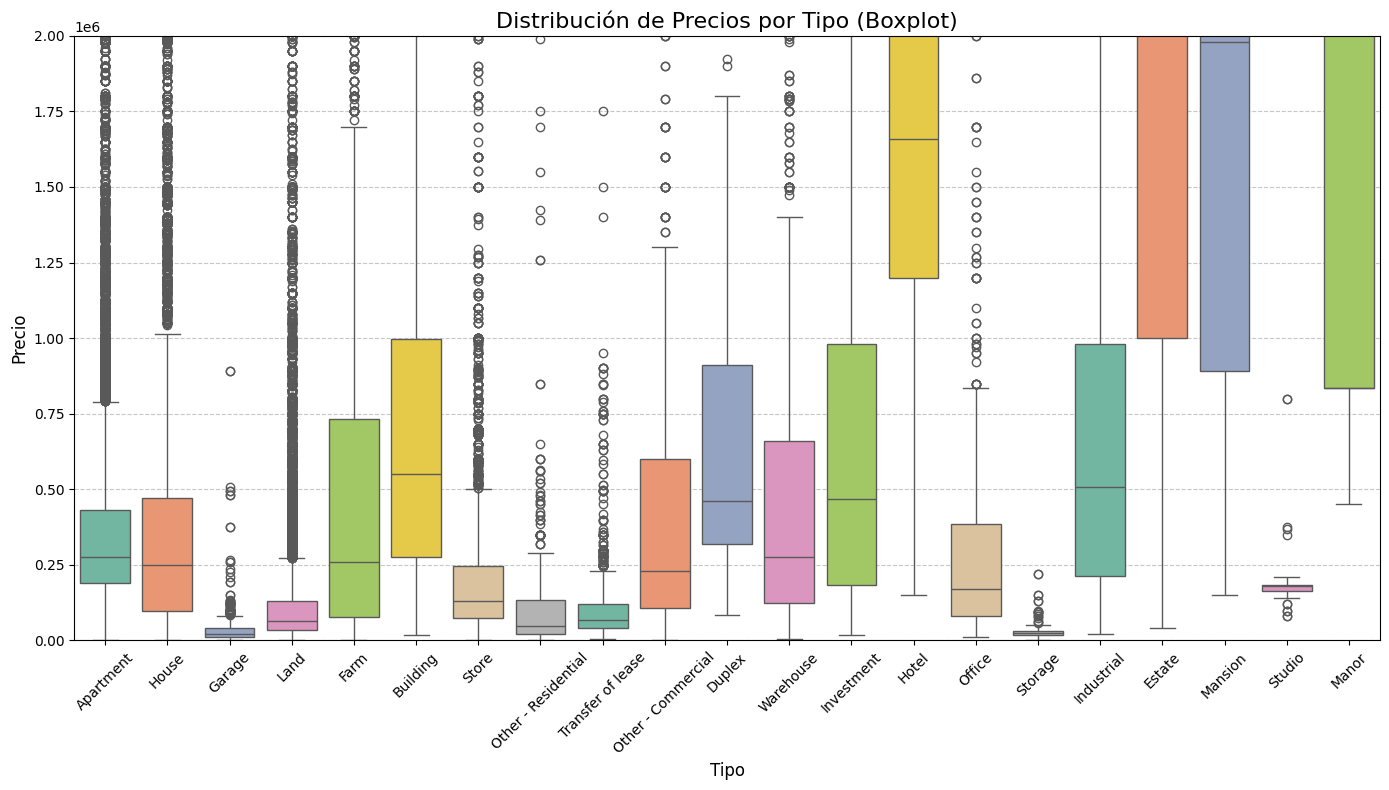

In [16]:
# Crear el diagrama de caja (boxplot)
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x="Type", y="Price", palette="Set2")

# Personalizar el gráfico
plt.title("Distribución de Precios por Tipo (Boxplot)", fontsize=16)
plt.xlabel("Tipo", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas si hay muchas categorías
plt.ylim(0, 2000000)  # Establecer el límite superior en 2,000,000

# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Podemos observar que el precio varía significativamente según el tipo de propiedad. Más adelante, evaluaremos si las diferencias entre los precios de algunos tipos de propiedades son estadísticamente significativas.

In [3]:
data_reduced = data[data["Price"] < 1102920]

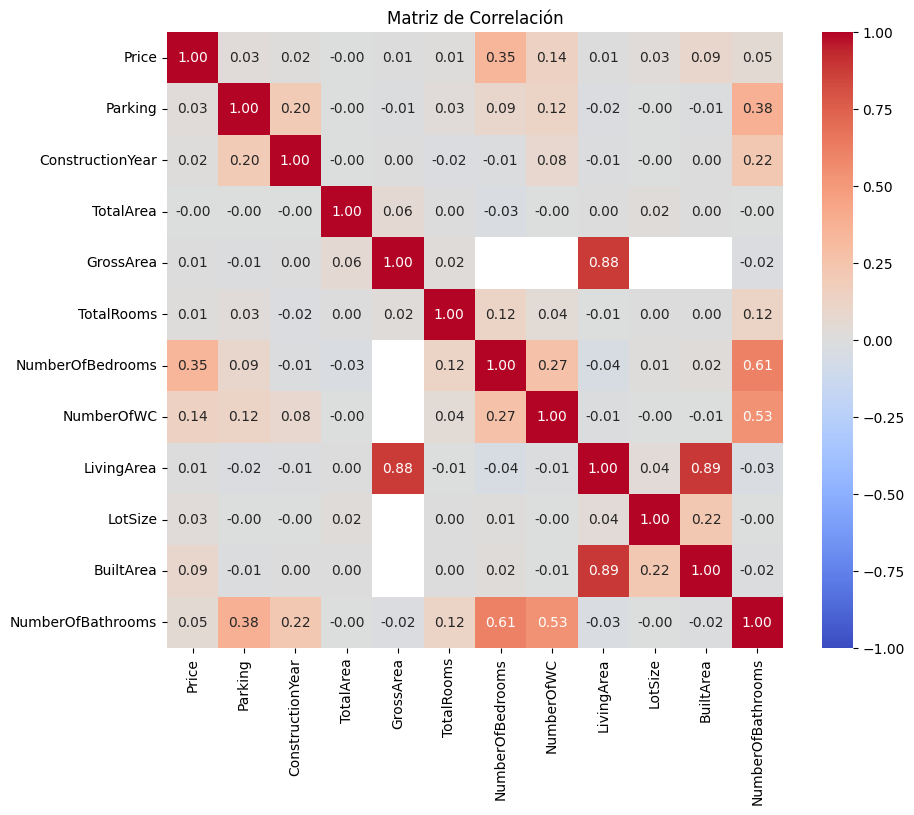

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr(method='pearson')

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True, fmt=".2f")

# Añadir título
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()


Para enfocar el estudio y lograr mayor precisión, centraremos el análisis en propiedades cuyo coste sea inferior a 1.102.920 €. Este umbral corresponde al precio a partir del cual se aplica el porcentaje más alto de impuestos en Portugal, considerando que estas propiedades no se clasifican como de alto standing. Este enfoque nos permitirá obtener conclusiones más relevantes para la mayoría de los inmuebles.
![Cotización](img/cotizacion.png)


In [5]:
data_reduced = data[data["Price"] < 1102920]

# Estudio de la normalidad de los datos
- Análisis
- Hitograma
- Simetría (media/mediana/skewness)
- Diagrama de cajas
- Q-Q plot
- Test de normalidad

## Análisis de la distribución de distintas columnas

Añadir narrativa sobre lo que se está haciendo para saber si es normal o no y que conclusiones tenermos. (dejaría el seguno método, el fitter. Me parece más limpio) + Añadir esto mismo que hemos hecho para el precio pero para una variable que sepamos que sigue un adistribución normal. Para ver que tal y como salen los numeros y los tests. 

In [22]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

resultados_distribucion = {}

distribuciones = {
    'normal': stats.norm,
    'lognormal': stats.lognorm,
    'exponencial': stats.expon,
    'gamma': stats.gamma,
    'beta': stats.beta
}

for column in numerical_data.columns:
    # Asegurarse de que la columna no tenga valores nulos o infinitos
    cleaned_data = numerical_data[column].replace([np.inf, -np.inf], np.nan).dropna()

    if len(cleaned_data) > 0:  # Solo proceder si hay datos válidos
        resultados = {}

        for nombre, distribucion in distribuciones.items():
            try:
                # Ajustar la distribución a los datos
                params = distribucion.fit(cleaned_data)

                D, p_value = stats.kstest(cleaned_data, distribucion.cdf, args=params)

                resultados[nombre] = p_value
            except Exception as e:
                print(f"Error al ajustar la distribución {nombre} para la variable {column}: {e}")


        if resultados:
            mejor_distribucion = max(resultados, key=resultados.get)
            resultados_distribucion[column] = mejor_distribucion

for variable, distribucion in resultados_distribucion.items():
    print(f'La variable "{variable}" se ajusta mejor a la distribución: {distribucion}')

/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/estadistica/.venv/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py:790: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/estadistica/.venv/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/estadistica/.venv/lib/python3.13/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/estadistica/.venv/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np

La variable "Price" se ajusta mejor a la distribución: lognormal
La variable "Parking" se ajusta mejor a la distribución: normal
La variable "ConstructionYear" se ajusta mejor a la distribución: normal
La variable "TotalArea" se ajusta mejor a la distribución: normal
La variable "GrossArea" se ajusta mejor a la distribución: normal
La variable "TotalRooms" se ajusta mejor a la distribución: normal
La variable "NumberOfBedrooms" se ajusta mejor a la distribución: normal
La variable "NumberOfWC" se ajusta mejor a la distribución: normal
La variable "LivingArea" se ajusta mejor a la distribución: normal
La variable "LotSize" se ajusta mejor a la distribución: normal
La variable "BuiltArea" se ajusta mejor a la distribución: lognormal
La variable "NumberOfBathrooms" se ajusta mejor a la distribución: normal


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
halfnorm,5.904206e-16,3.698667e+06,3.698686e+06,inf,0.759519,0.0
truncnorm,7.263467e-16,3.684335e+04,3.688194e+04,inf,0.736455,0.0
genhalflogistic,1.644533e-15,7.455071e+04,7.457965e+04,inf,0.721607,0.0
cosine,1.857566e-15,inf,inf,2.242844,0.599280,0.0
norm,2.009372e-15,3.724966e+06,3.724985e+06,inf,0.464634,0.0


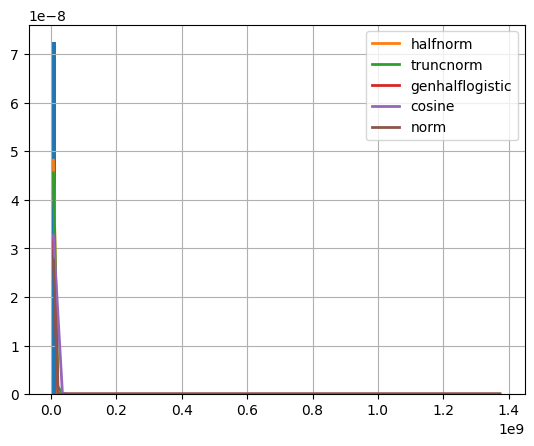

In [14]:
from fitter import Fitter, get_distributions
data = data[data["Price"].notnull()]

fitter = Fitter(
    data["Price"],
    distributions=get_distributions()  # Ajustar a las distribuciones más comunes
)
fitter.fit()
fitter.summary()

## Histograma del precio

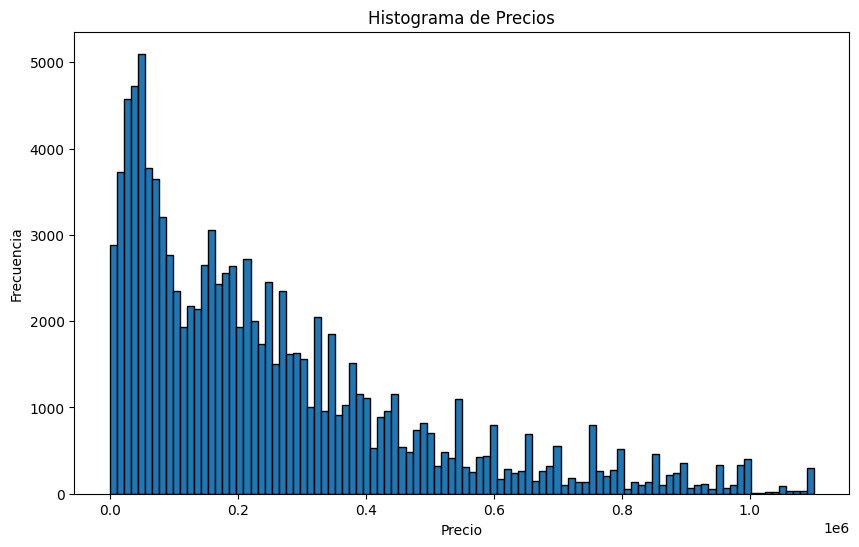

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(data_reduced['Price'], bins = 100 , edgecolor='black')  # Ajusta el número de bins según lo que necesites
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

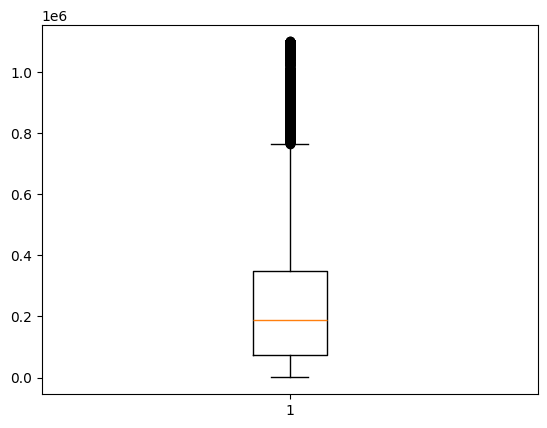

In [19]:
plt.boxplot(data_reduced["Price"])
plt.show()

## Simetrías y estadísticos

In [36]:
from scipy.stats import skew

media = data["Price"].mean()
mediana = data["Price"].median()
asimetria = skew(data["Price"])

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Asimetría (Skewness): {asimetria}")


Media: 369683.92854787805
Mediana: 199900.0
Asimetría (Skewness): 317.4386724268403


## Q-Q Plot

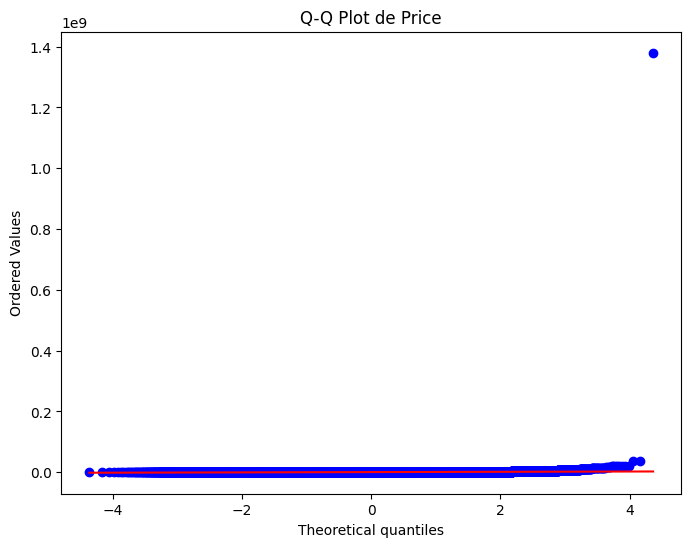

In [37]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data["Price"], dist="norm", plot=plt)
plt.title("Q-Q Plot de Price")
plt.show()


In [39]:
from scipy.stats import shapiro

stat, p = shapiro(data["Price"])
print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p}")

if p > 0.05:
    print("Los datos parecen seguir una distribución normal (no se rechaza H0).")
else:
    print("Los datos no siguen una distribución normal (se rechaza H0).")


Estadístico de Shapiro-Wilk: 0.012576300965830733, p-valor: 2.931015925925355e-186
Los datos no siguen una distribución normal (se rechaza H0).


/Users/jorgemolto/Documents/PARA/01-Projects/EDEM/MIA/estadistica/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 108035.
  res = hypotest_fun_out(*samples, **kwds)


# Estimación puntual y por intervalos 

El precio no sigue una distribución normal; sin embargo, según la teoría del límite central, dado el tamaño elevado de la muestra (cerca de 100.000 registros), podemos asumir que la distribución de la media tiende a ser normal.

In [4]:
precio_data = data_reduced["Price"]
media_precio = precio_data.mean()
mediana_precio = precio_data.median()
desviacion_estandar_precio = precio_data.std(ddof=1)

print("Media:", media_precio)
print("Mediana:", mediana_precio)
print("Desviación estandar:", desviacion_estandar_precio)


Media: 251266.3540859808
Mediana: 189550.0
Desviación estandar: 227079.47669805895


Ahora nuestro objetivo es estudiar la media de la muetra, obteniendo un intervalo de confianza en el cual nosotros podamos confiar que se encuentre la media real.

Como ya sabemos, podemos tratar la media de una muestra como una distribucion normal. Pero para nuestro caso al no conocer de la desviación estándar real, usaremos la desviación estándar de la muestra como sustituto al crear intervalos de confianza. Dado que la desviación estándar de la muestra puede no coincidir con el parámetro de la población, el intervalo tendrá más error cuando no se conozca la desviación estándar de la población. Para dar cuenta de este error, usamos lo que se conoce como valor crítico t en lugar del valor crítico z. El valor t-crítico se extrae de lo que se conoce como distribución t, una distribución que se parece mucho a la distribución normal pero que se hace más y más ancha a medida que disminuye el tamaño de la muestra.

In [ ]:
sample_size = data_reduced["Price"].shape[0]
sample_mean = data_reduced["Price"].mean()

nivel_confianza = 0.95

z_critical = stats.norm.ppf(q = ((1 + nivel_confianza) / 2))  # Get the z-critical value*
print("z-critical value:", z_critical)

t_critical = stats.t.ppf(q = ((1 + nivel_confianza) / 2), df=sample_size-1)  # Get the t-critical value*
print("t-critical value:", t_critical)

z-critical value: 1.959963984540054
t-critical value: 1.959985893657218


Como se puede apreciar en el anterior bloque de codigo, si se tiene una muestra grande, el valor t-crítico se acercará al valor z-crítico, por lo que hay poca diferencia entre usar la distribución normal y la distribución t. Apesar de esto utilizaremos la distribución t.

In [5]:
sample_stdev = data_reduced["Price"].std(ddof=1)  # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Intervalo de confianza: {confidence_interval[0]:.3f}€ - {confidence_interval[1]:.3f}€")

Intervalo de confianza: 249913.794€ - 252618.915€


El intervalo de confianza que obtenemos nos dice que la media de los precios reales se encontrará entre 249913.794€ - 252618.915€ en un 95%

## Area total

¿Se puede calcular un intervalo de confianza del área?

# ANOVA